# Percentiles, outliers and box plots

## 1. Mean and median:
"An outlier can significantly affect the value of the mean, but not the median."

### Computing means:
The mean of all measurements gives an indication of the typical magnitude of a measurement. It is computed using `np.mean()`.

### Instructions:
* Compute the mean petal length of _Iris versicolor_ from Anderson's classic data set. The variable `versicolor_petal_length` is provided in your namespace. Assign the mean to `mean_length_vers`.
* Hit submit to print the result.

In [1]:
# Import pandas
import pandas as pd
# Import plotting modules
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
# Set default Seaborn style
sns.set()
# Import numpy
import numpy as np

In [3]:
# Load iris file
# file_path = '13_Statistical_Thinking_1/_datasets/'  # path for Intellij
file_path = '../_datasets/'                            # path for Jupyter
iris = pd.read_csv(file_path+'iris.csv')

# Filter all rows with versicolor in species column
versicolor = iris.loc[iris['species']=='versicolor']
# Select petal length column
versicolor_petal_length = versicolor.iloc[:,2]

In [4]:
# Compute the mean: mean_length_vers
mean_length_vers = np.mean(versicolor_petal_length)

# Print the result with some nice formatting
print('I. versicolor:', mean_length_vers, 'cm')

I. versicolor: 4.26 cm


## 2. Computing percentiles:
In this exercise, you will compute the percentiles of petal length of Iris versicolor.

### Instructions:
* Create `percentiles`, a NumPy array of percentiles you want to compute. These are the $2.5th$, $25th$, $50th$, $75th$, and $97.5th$. You can do so by creating a list containing these ints/floats and convert the list to a NumPy array using `np.array()`. For example, `np.array([30, 50])` would create an array consisting of the $30th$ and $50th$ percentiles.
* Use `np.percentile()` to compute the percentiles of the petal lengths from the _Iris versicolor samples_. The variable `versicolor_petal_length` is in your namespace.
* Print the percentiles.

In [7]:
# Specify array of percentiles: percentiles
percentiles = np.array([2.5, 25, 50, 75 ,97.5])

# Compute percentiles: ptiles_vers
ptiles_vers = np.percentile(versicolor_petal_length, percentiles)

# Print the result
print(ptiles_vers)

[3.3    4.     4.35   4.6    4.9775]


## 3. Comparing percentiles to ECDF:
To see how the percentiles relate to the ECDF, you will plot the percentiles of _Iris versicolor_ petal lengths you calculated in the last exercise on the ECDF plot you generated in chapter 1. The percentile variables from the previous exercise are available in the workspace as `ptiles_vers` and `percentiles`.

Note that to ensure the Y-axis of the ECDF plot remains between 0 and 1, you will need to rescale the `percentiles` array accordingly - in this case, dividing it by 100.

Instructions:
* Plot the percentiles as red diamonds on the ECDF. Pass the x and y co-ordinates - `ptiles_vers` and `percentiles/100` - as positional arguments and specify the `marker='D'`, `color='red'` and `linestyle='none'` keyword arguments. The argument for the y-axis - `percentiles/100` has been specified for you.
* Display the plot.

In [10]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

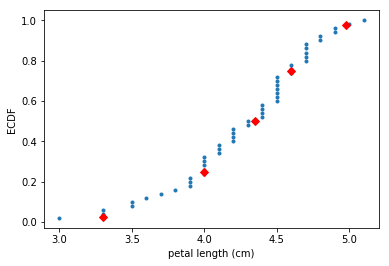

In [11]:
# Compute ECDF for versicolor data: x_vers, y_vers
x_vers, y_vers = ecdf(versicolor_petal_length)

# Plot the ECDF
_ = plt.plot(x_vers, y_vers, '.')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_vers, percentiles/100, marker='D', color='red',
             linestyle='none')

# Show the plot
plt.show()

## 4. Box-and-whisker plot:
Making a box plot for the petal lengths is unnecessary because the iris data set is not too large and the bee swarm plot works fine. However, it is always good to get some practice. Make a box plot of the iris petal lengths. You have a pandas DataFrame, `df`, which contains the petal length data, in your namespace. Inspect the data frame df in the IPython shell using `df.head()` to make sure you know what the pertinent columns are.

For your reference, the code used to produce the box plot in the video is provided below:

`_ = sns.boxplot(x='east_west', y='dem_share', data=df_all_states)`

`_ = plt.xlabel('region')`

`_ = plt.ylabel('percent of vote for Obama')`

In the IPython Shell, you can use `sns.boxplot`? or `help(sns.boxplot)` for more details on how to make box plots using seaborn.

### Instructions:
* The set-up is exactly the same as for the bee swarm plot; you just call `sns.boxplot()` with the same keyword arguments as you would `sns.swarmplot()`. The x-axis is `'species'` and y-axis is `'petal length (cm)'`.
* Don't forget to label your axes!
* Display the figure using the normal call.

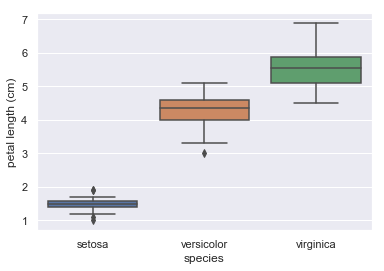

In [15]:
# Create box plot with Seaborn's default settings
_ = sns.boxplot(x='species', y='petal length (cm)', data=iris)

# Label the axes
_ = plt.xlabel('species')
_ = plt.ylabel('petal length (cm)')

# Show the plot
plt.show()